In [2]:
import os
import sys
from pathlib import Path
sys.path.append(os.path.join(Path().resolve(), "src/"))

from src.config import ModelConfig, TrainerConfig
from src.dataset import load_dataset_manager
from src.trainers import PyTorchTrainer
from src.analyst import Analyst

/Users/tatsuyaishii/dev/clones/my-doc2vec/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# コンフィグの設定
model_config = ModelConfig()
trainer_config = TrainerConfig()

In [4]:
# データセットのロード
dataset_manager = load_dataset_manager(
    dataset_name=trainer_config.dataset_name,
    dataset_dir=trainer_config.dataset_dir,
    load_dataset=trainer_config.load_dataset,
    save_dataset=trainer_config.save_dataset,
    window_size=model_config.window_size,
)

load cached dataset_manager from: cache/dataset/toydata-small.pickle


In [5]:
# Trainerの作成
trainer = PyTorchTrainer(
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config,
)

load_state_dict from: cache/model/toydata-small/attentive.pt


In [6]:
# モデルの学習
trainer.fit()

train start


100%|██████████| 71/71 [00:00<00:00, 321.92it/s]


Epoch: 1, loss: 0.25385820277979676, test_loss: {'test': 0.251783431205951}
saved best model to cache/model/toydata-small/best-attentive.pt


100%|██████████| 71/71 [00:00<00:00, 332.07it/s]


Epoch: 2, loss: 0.25067079738831854, test_loss: {'test': 0.24947866776459654}
saved best model to cache/model/toydata-small/best-attentive.pt


100%|██████████| 71/71 [00:00<00:00, 329.98it/s]

Epoch: 3, loss: 0.2484965784029222, test_loss: {'test': 0.24770984242499713}
saved best model to cache/model/toydata-small/best-attentive.pt
train end
saved model to cache/model/toydata-small/attentive.pt


{'train': [0.25385820277979676, 0.25067079738831854, 0.2484965784029222],
 'test': [0.251783431205951, 0.24947866776459654, 0.24770984242499713]}

In [7]:
# Analyst（モデルの出力を分析するクラス）インスタンスの作成
analyst = Analyst(trainer.model, dataset_manager)

In [8]:
# 系列と要素の関連性（デフォルトだと内積）の出力
analyst.similarity_between_seq_and_item(seq_index=0, num_recent_items=10)

,similarity,item
0,0.621333,v_1_M_2000
1,0.376747,v_1_E_2000
2,0.165197,v_2_E_2000
3,0.165197,v_2_E_2000
4,0.152063,v_2_F_1990
5,0.016204,v_2_M_1960
6,-0.136627,v_1_F_2000
7,-0.139115,v_1_M_1980
8,-0.267950,v_2_F_2000
9,-0.267950,v_2_F_2000


In [9]:
# 系列と要素の補助情報の関連性（デフォルトだと内積）の出力
analyst.similarity_between_seq_and_item_meta(seq_index=0, item_meta_name="genre")

,similarity,item_meta
0,0.087246,genre:F
1,0.087246,genre:F
2,0.087246,genre:F
3,0.087246,genre:F
4,0.087246,genre:F
5,0.087246,genre:F
6,0.087246,genre:F
7,0.087246,genre:F
8,0.087246,genre:F
9,0.087246,genre:F


In [10]:
# 系列の補助情報と要素の補助情報の関連性（デフォルトだと内積）の出力
analyst.similarity_between_seq_meta_and_item_meta("gender", "M", "genre")

,similarity,item_meta
0,0.223229,genre:E
1,0.223229,genre:E
2,0.223228,genre:E
3,0.223228,genre:E
4,0.223228,genre:E
5,0.223228,genre:E
6,0.223228,genre:E
7,0.223228,genre:E
8,0.223228,genre:E
9,0.223228,genre:E


In [11]:
# 系列と要素の固有の特徴と補助情報の関連性（デフォルトだと内積）の出力
analyst.analyze_seq(seq_index=0)

,similarity,seq,item
0,1.900300,gender:F,genre:F
1,1.400315,age:20,genre:M
2,0.922425,age:20,year:2000
3,0.905370,gender:F,genre:E
4,0.855080,gender:F,year:1990
5,0.718976,gender:F,year:1980
6,0.540995,gender:F,year:1960
7,0.489008,gender:F,year:2000
8,0.409812,u_0_F_20_20_F1,year:1980
9,0.339540,age:20,genre:F


(<Figure size 1200x800 with 2 Axes>, <AxesSubplot: >)

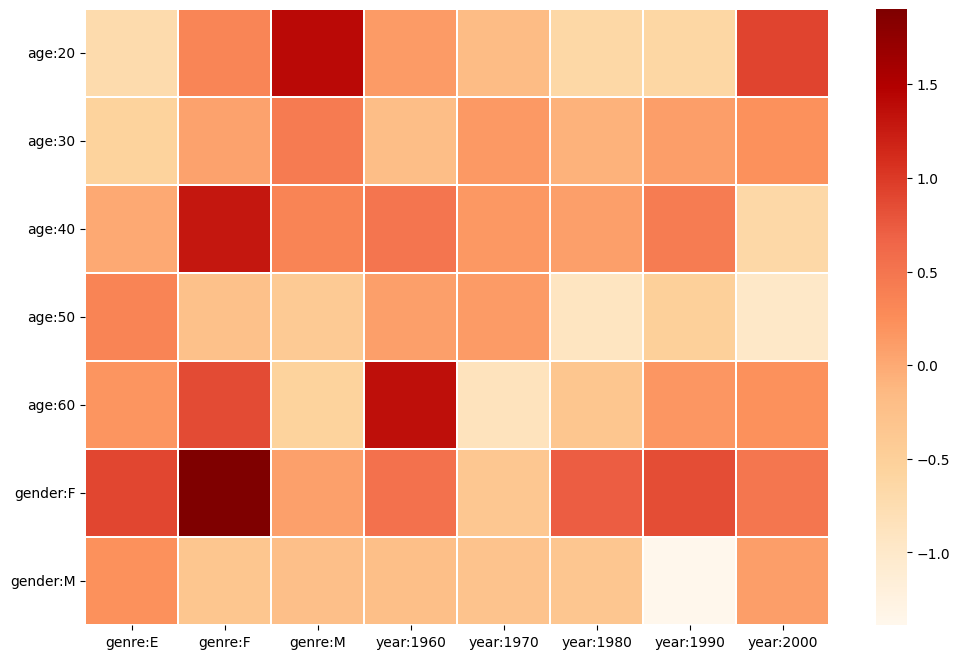

In [12]:
analyst.visualize_similarity_heatmap()